48 48


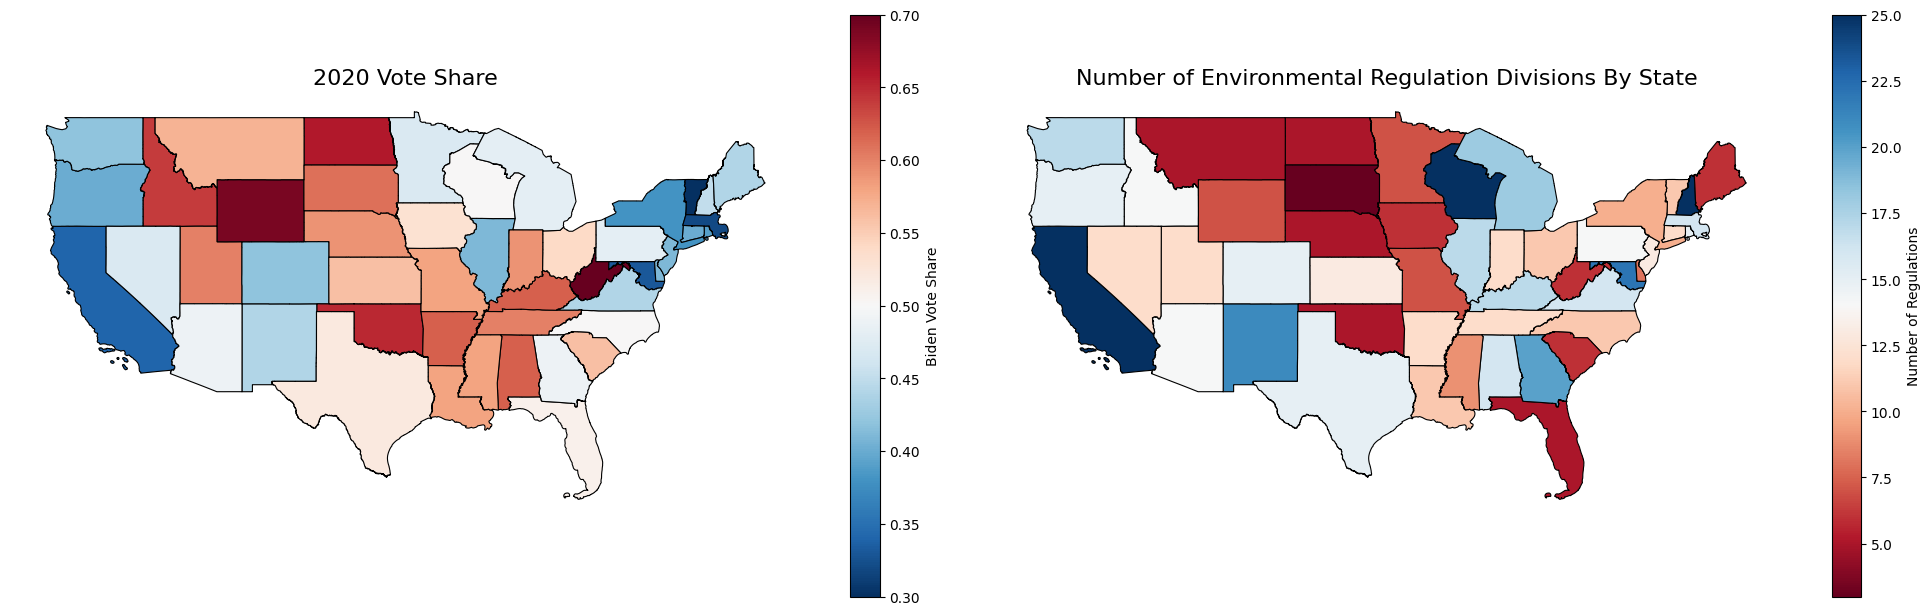

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file("tl_2024_us_state/tl_2024_us_state.shp")

exclude = ['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS']
gdf = gdf[~gdf['STUSPS'].isin(exclude)]

vote_data = pd.DataFrame({
    "STUSPS": [
        "AL", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
        "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
        "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
        "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
        "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
    ],
    "trump_share": [
        0.62, 0.49, 0.62, 0.34, 0.42, 0.40, 0.41, 0.51, 0.49,
        0.64, 0.41, 0.59, 0.53, 0.56, 0.62, 0.58, 0.44, 0.33,
        0.32, 0.48, 0.47, 0.58, 0.58, 0.57, 0.59, 0.47, 0.45, 0.41,
        0.44, 0.38, 0.50, 0.66, 0.54, 0.65, 0.40, 0.48, 0.39, 0.56,
        0.61, 0.60, 0.52, 0.60, 0.30, 0.44, 0.42, 0.70, 0.50, 0.69
    ],
    
    "pm25": [
    16, 14, 12, 25, 15, 12, 8, 5, 20, 14,
    17, 12, 6, 13, 17, 11, 6, 22, 16, 18,
    7, 9, 7, 5, 5, 12, 25, 13, 21, 10,
    11, 5, 11, 5, 15, 14, 15, 6, 3, 12,
    15, 12, 11, 16, 17, 6, 25, 7]
})

print(len(vote_data["pm25"]), len(vote_data["trump_share"]))

gdf = gdf.merge(vote_data, on="STUSPS")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf.plot(column='trump_share',
         cmap='RdBu_r',
         linewidth=0.8,
         edgecolor='black',
         legend=True,
         legend_kwds={'label': "Biden Vote Share", 'shrink': 0.6},
         ax=ax1)
ax1.set_title("2020 Vote Share", fontsize = 16)
ax1.axis('off')

gdf.plot(column='pm25',
         cmap='RdBu',
         linewidth=0.8,
         edgecolor='black',
         legend=True,
         legend_kwds={'label': "Number of Regulations", 'shrink': 0.6},
         ax=ax2)
ax2.set_title("Number of Environmental Regulation Divisions By State", fontsize = 16)
ax2.axis('off')

plt.tight_layout()
plt.show()
